### Predictive Analytics
### Covid-19
### Anna Jazayeri

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer

# Importing dataset

In [3]:
df = pd.read_csv("COVID19-eng.csv", index_col=False)
df = df.drop(columns=['COV_ID'])
df

COV_REG  COV_EW  COV_EWG  COV_EY  COV_GDR  COV_AGR  COV_HSP  COV_DTH
0              2      13        0      22        2        4        9        9
1              2      49        0      21        1        1        9        9
2              2      15        0      22        1        3        9        9
3              2      47        0      20        1        2        9        9
4              5       8        0      21        2        6        3        9
...          ...     ...      ...     ...      ...      ...      ...      ...
4311840        5      52        0      21        1        3        9        9
4311841        2      20        0      21        2        6        9        9
4311842        4      47        0      20        1        2        3        2
4311843        3       8        0      21        1        1        3        2
4311844        4      14        0      21        2        1        3        2

[4311845 rows x 8 columns]

In [4]:
# 'region', 'episode_week', 'episode_week_group', 'episode_year', 'gender', 'age', 'hospital_status', 'death'

## Since the columns aren't entirely clear to me at the moment, I would rather rename each column based on the dataset's description provided in the following link: https://www150.statcan.gc.ca/n1/pub/13-26-0002/132600022020001-eng.htm


In [5]:
column_name_mapping = {
    'COV_REG': 'region',
    'COV_EW': 'episode_week',
    'COV_EWG': 'episode_week_group',
    'COV_EY': 'episode_year',
    'COV_GDR': 'gender',
    'COV_AGR': 'age',
    'COV_HSP': 'hospital_status',
    'COV_DTH': 'death'
}

# Rename the columns based on the mapping
df.rename(columns=column_name_mapping, inplace=True)
df

region  episode_week  episode_week_group  episode_year  gender  age  \
0             2            13                   0            22       2    4   
1             2            49                   0            21       1    1   
2             2            15                   0            22       1    3   
3             2            47                   0            20       1    2   
4             5             8                   0            21       2    6   
...         ...           ...                 ...           ...     ...  ...   
4311840       5            52                   0            21       1    3   
4311841       2            20                   0            21       2    6   
4311842       4            47                   0            20       1    2   
4311843       3             8                   0            21       1    1   
4311844       4            14                   0            21       2    1   

         hospital_status  death  
0                      9      9  
1                      9      9  
2                      9      9  
3                      9      9  
4                      3      9  
...                  ...    ...  
4311840                9      9  
4311841                9      9  
4311842                3      2  
4311843                3      2  
4311844                3      2  

[4311845 rows x 8 columns]

# Cleaning Data

In [6]:
# Display general information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311845 entries, 0 to 4311844
Data columns (total 8 columns):
 #   Column              Dtype
---  ------              -----
 0   region              int64
 1   episode_week        int64
 2   episode_week_group  int64
 3   episode_year        int64
 4   gender              int64
 5   age                 int64
 6   hospital_status     int64
 7   death               int64
dtypes: int64(8)
memory usage: 263.2 MB


## result: all columns are integer, no need to convert them to numeric.

In [7]:
# Count missing values in each column
missing_data = df.isna().sum()

# Display the count of missing values
print(missing_data)

region                0
episode_week          0
episode_week_group    0
episode_year          0
gender                0
age                   0
hospital_status       0
death                 0
dtype: int64


## result: there is no missing data. 

# finding ouliers with boxplot

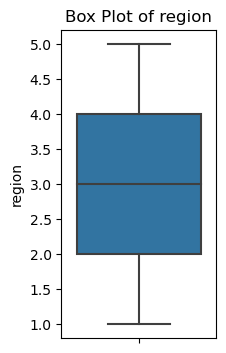

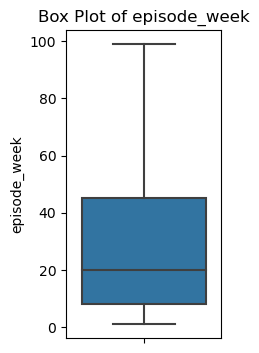

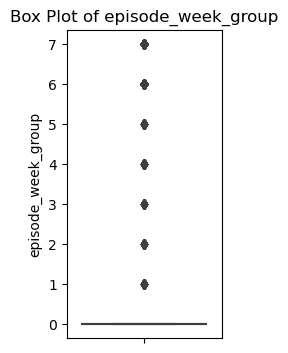

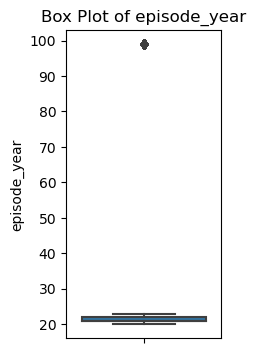

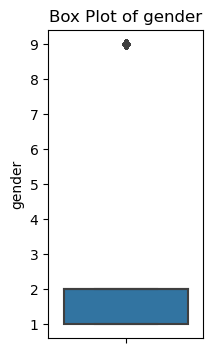

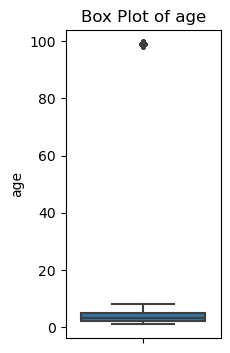

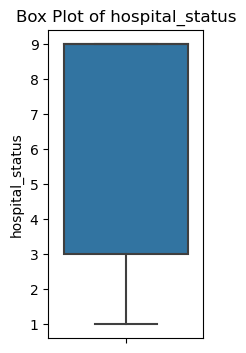

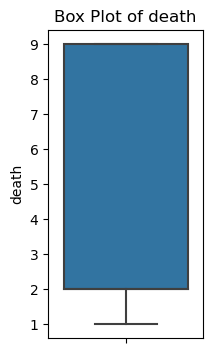

In [8]:
# boxplots

for column in df.columns:
    plt.figure(figsize=(2, 4))
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()


## Result: I found some outliers in columns "episode_week_group", "episode_year," <br><br>"gender," and "age." But after careful investigation in the dataset and <br><br>also in the description of the dataset (that is available in this link: <br><br>https://www150.statcan.gc.ca/n1/pub/13-26-0002/132600022020001-eng.htm),<br><br> I found out that all "Not stated/Unknown" values are classified as '9' or '99,' <br><br>which means the data collector (preparer) replaced all missing values with these two data. <br><br>So in the following steps, first of all, I must convert all these 9s and 99s to NaN values.<br><br>


In [9]:
"""
In the following codes I will change the value 9 in 'gender' to Nan values, and also change the value 9 in 
'hospital_status' and 'death columns' to -1, because the missing values  in these two columns are very significant 
and these missing values shows the "Not Stated", so we can indicate them as a new category in these two columns.  
and  I will change the value 99 in 'episode_week', 'episode_year' and 'age' columns to Nan values too. 

""" 
col_9=['hospital_status', 'death'] 
gender_9 = ['gender']
col_99 = ['episode_week', 'episode_year', 'age']

df[col_9] = df[col_9].replace(9, -1)
df[gender_9] = df[gender_9].replace(9, np.nan)
df[col_99] = df[col_99].replace(99, np.nan)

# Count missing values in each column
missing_data = df.isna().sum()

# Display the count of missing values
print(missing_data)

region                    0
episode_week          13904
episode_week_group        0
episode_year          10933
gender                14798
age                    2819
hospital_status           0
death                     0
dtype: int64


## Result:
### Now we can see how many missing values we actually have in the columns. Therefore, I need to handle <br><br>these missing values properly. I've realized that in this dataset, some columns, such as "age" and "region,"<br><br> are not truly about exact numbers; they're more like categories than actual numerical values, such as a <br><br>person's real age. Consequently, when dealing with these missing values, we should treat them as <br><br>categories rather than numerical values.
## Because of the nature and the characteristics of our categorical columns, I think it is <br><br>better to choose a more advanced imputation techniques for replacing the missing <br><br>values. For example using predictive models to impute missing values or imputing <br><br>based on the values of related columns. 

In [10]:
""" 
here for dealing with missing values I used SimpleImputer from sklearn library.
"""

# Create a SimpleImputer with the 'most_frequent' strategy for categorical columns
col_imputer = SimpleImputer(strategy='most_frequent')

# Specify the categorical columns to impute
col = ['gender', 'episode_week', 'episode_year', 'age']

# Impute missing values in categorical columns
df[col] = col_imputer.fit_transform(df[col])

# Now, df contains imputed values for the specified columns
df.isna().sum()

region                0
episode_week          0
episode_week_group    0
episode_year          0
gender                0
age                   0
hospital_status       0
death                 0
dtype: int64

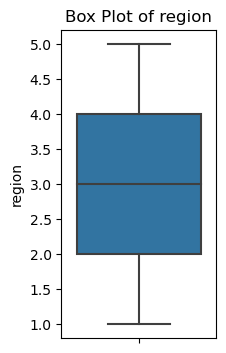

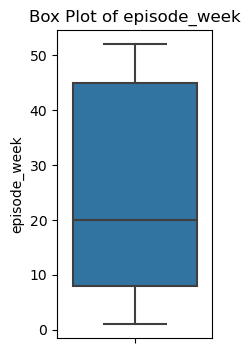

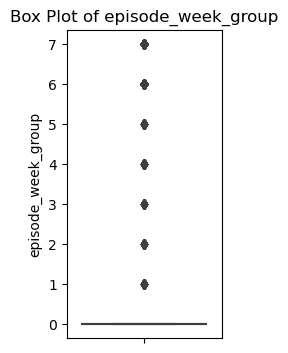

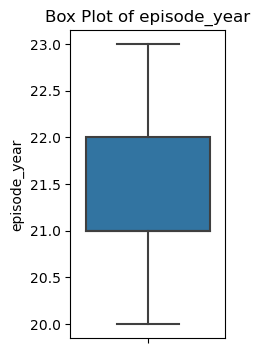

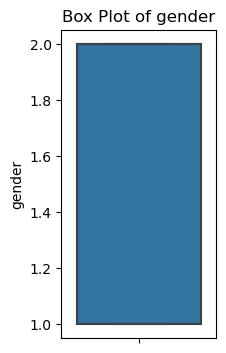

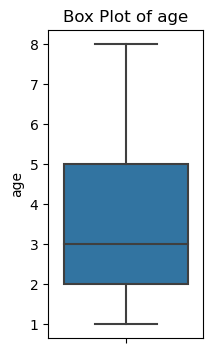

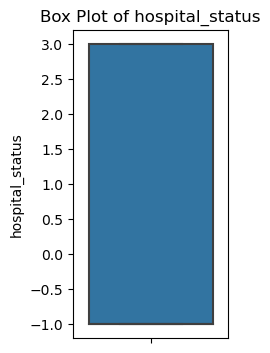

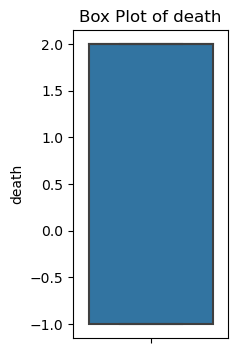

In [11]:
# boxplots

for column in df.columns:
    plt.figure(figsize=(2, 4))
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

# Finding ouliers 
# Outlier detection methods for categorical data are not applicable in <br><br> the same way as for numerical data. However, you can gain insights into your <br><br>categorical data by using the value_counts method, which provides the <br><br>frequency of each element within a column. Visualizing this data through <br><br>pie charts can be a practical approach to understand the distribution of <br><br>categorical values. 
source link: https://math.stackexchange.com/questions/219264/are-outliers-possible-with-categorical-data


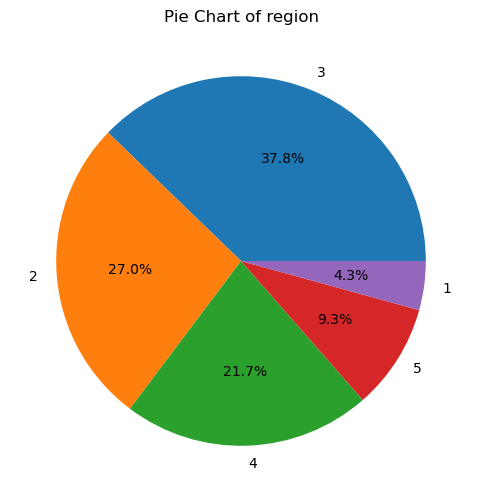

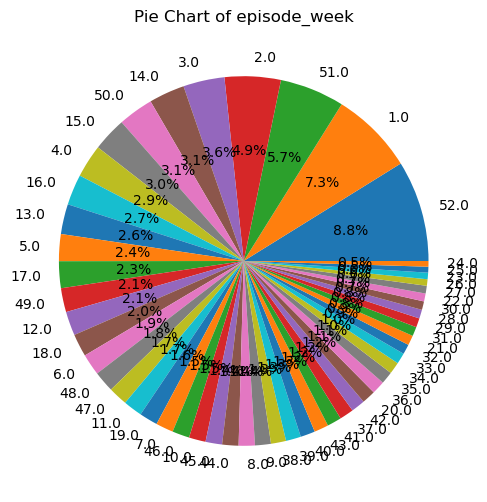

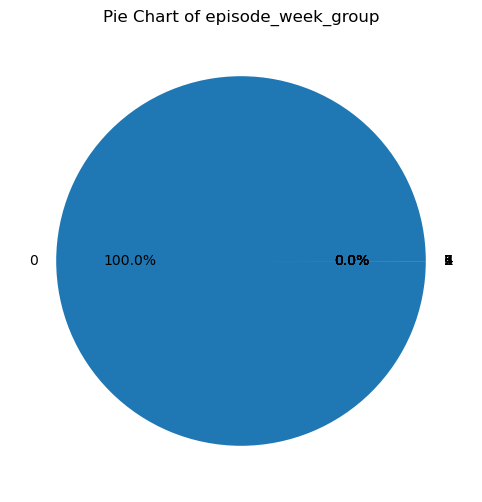

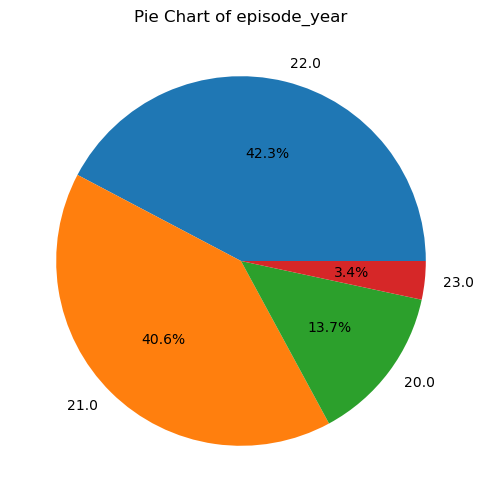

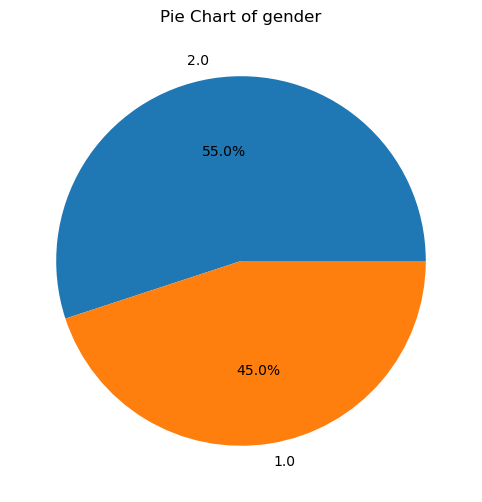

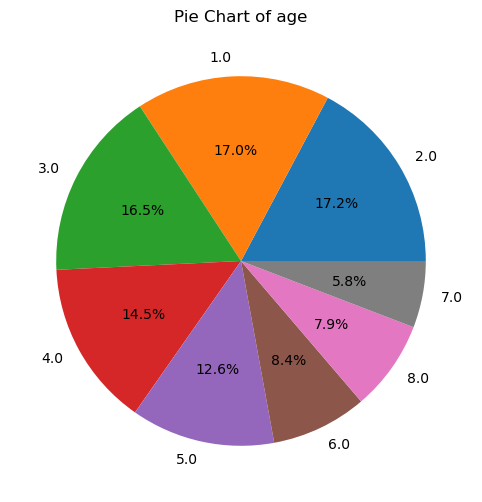

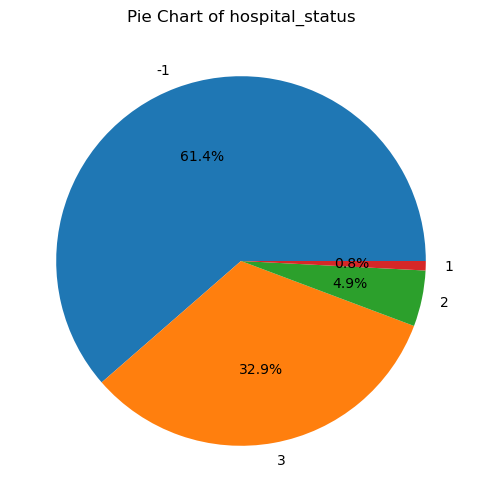

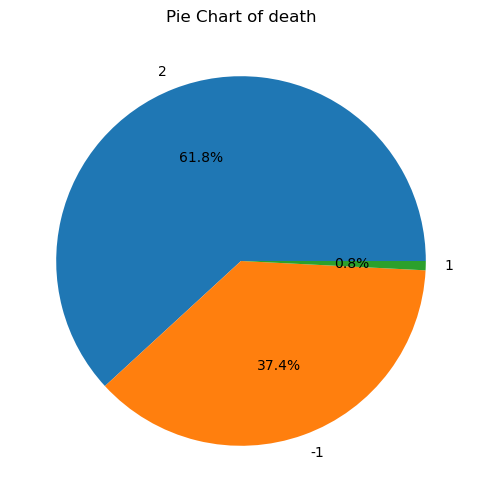

In [12]:
# List of columns to create pie charts for
columns_to_plot = ['region', 'episode_week', 'episode_week_group', 'episode_year', 'gender', 'age', 'hospital_status', 'death']

# Assuming 'df' is your DataFrame
for column in columns_to_plot:
    column_count = df[column].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(column_count, labels=column_count.index, autopct='%1.1f%%')
    plt.title(f'Pie Chart of {column}')
    plt.show()

In [13]:
# if We remove all "Not Stated" values from two columns of "hospital_status" and "death"
"""df = df.replace(-1, np.nan)
df.dropna(inplace=True)
df.isna().sum()"""

'df = df.replace(-1, np.nan)\ndf.dropna(inplace=True)\ndf.isna().sum()'

In [14]:
# List of columns to create pie charts for
"""columns_to_plot = ['region', 'episode_week', 'episode_week_group', 'episode_year', 'gender', 'age', 'hospital_status', 'death']

for column in columns_to_plot:
    column_count = df[column].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(column_count, labels=column_count.index, autopct='%1.1f%%')
    plt.title(f'Pie Chart of {column}')
    plt.show()"""

"columns_to_plot = ['region', 'episode_week', 'episode_week_group', 'episode_year', 'gender', 'age', 'hospital_status', 'death']\n\nfor column in columns_to_plot:\n    column_count = df[column].value_counts()\n    plt.figure(figsize=(8, 6))\n    plt.pie(column_count, labels=column_count.index, autopct='%1.1f%%')\n    plt.title(f'Pie Chart of {column}')\n    plt.show()"

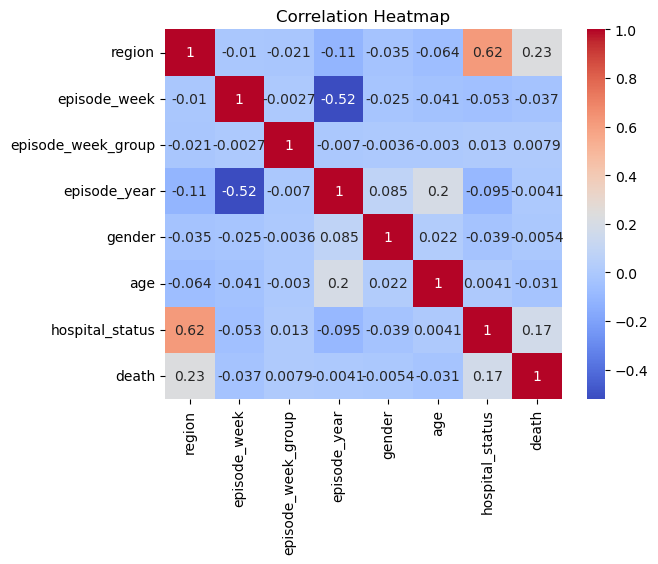

In [15]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

There is a significant relationship between region and age.


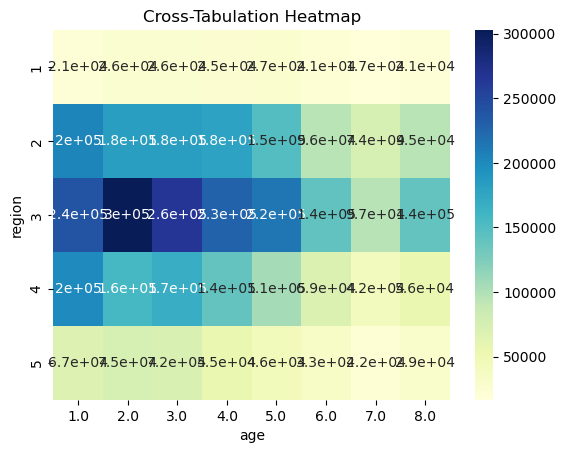

In [43]:

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['region'], df['age'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

if p < 0.05:  # Adjust the significance level as needed
    print("There is a significant relationship between region and age.")
else:
    print("No significant relationship between region and age.")

cross_tab = pd.crosstab(df['region'], df['age'])
# You can also visualize the cross-tabulation using a heatmap
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True)
plt.title("Cross-Tabulation Heatmap")
plt.show()


Interpreting heatmaps from cross-tabulations can be a bit tricky, but they can provide valuable insights into the relationships between two categorical variables. Here's a simple guide to help we interpret the information in a heatmap:

1.	Color Intensity: In a heatmap, the intensity of colors represents the frequency or count of observations in the cells. The colors can range from light (low counts) to dark (high counts). In our case, we used the 'YlGnBu' colormap, where lighter colors indicate lower counts and darker colors indicate higher counts.

2.	Annotations: Many heatmaps, as in our example, have numerical values inside each cell. These numbers show the actual counts in that cell. These are important because they give we a quantitative sense of the relationship between the two categorical variables.

3.	Patterns: Look for patterns or clusters of similar colors. These clusters can indicate associations between the categories of the two variables. For example, if we see a cluster of dark cells in a specific row and column, it means that those categories often occur together.

4.	Strength of Association: The strength of the relationship can be assessed by how much the colors vary. If we have a lot of dark cells in one area and mostly light cells in another, it suggests a strong relationship between the two variables. If the colors are fairly uniform, it indicates a weak relationship.

5.	Interpretation: To interpret the relationship, think about what the variables represent. For example, if ou're cross-tabulating 'region' and 'age,' and we see a dark cell at the intersection of 'Region A' and 'Age Group 30-40,' it suggests that a significant number of individuals in Region A fall into the age group 30-40.

6.	Expectations: Consider what we would expect to see based on our domain knowledge. Are the patterns in the heatmap aligning with our expectations, or are there surprises?

7.	Statistical Significance: Remember that the heatmap doesn't tell we whether the relationship is statistically significant. It only shows the observed frequencies. Ou'd use statistical tests (like the chi-squared test) to determine significance.

8.	Further Analysis: If we notice a strong relationship in the heatmap, we might want to investigate it further. It could be the basis for more in-depth statistical analysis or further exploration in our dataset.

source link: https://chartio.com/learn/charts/heatmap-complete-guide/


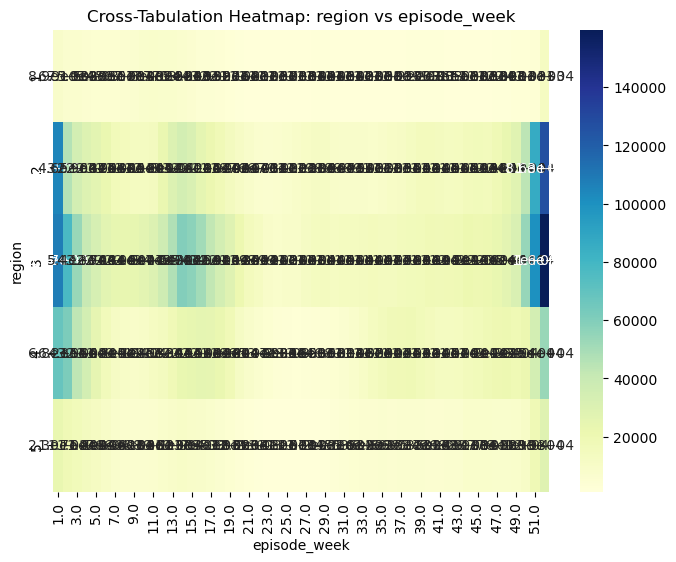

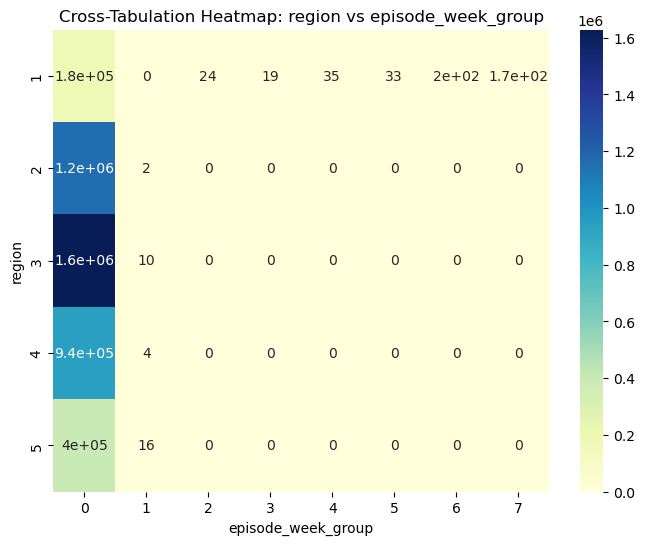

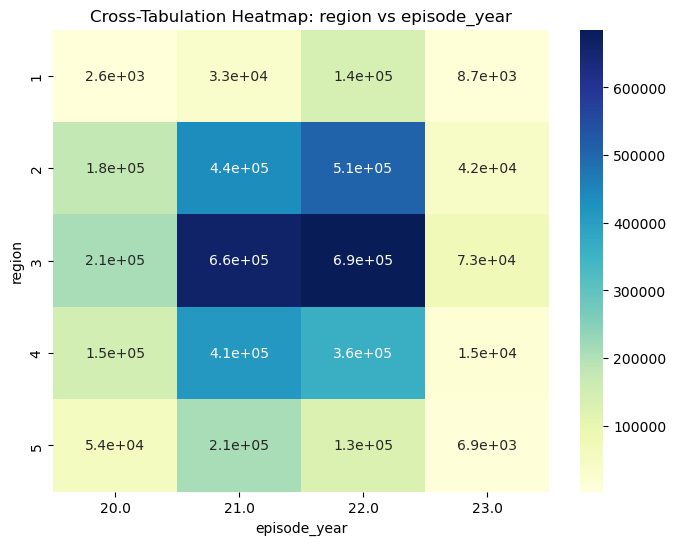

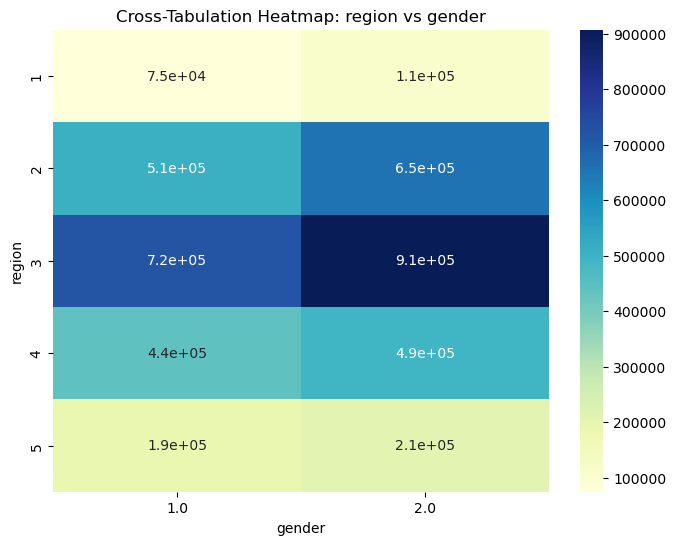

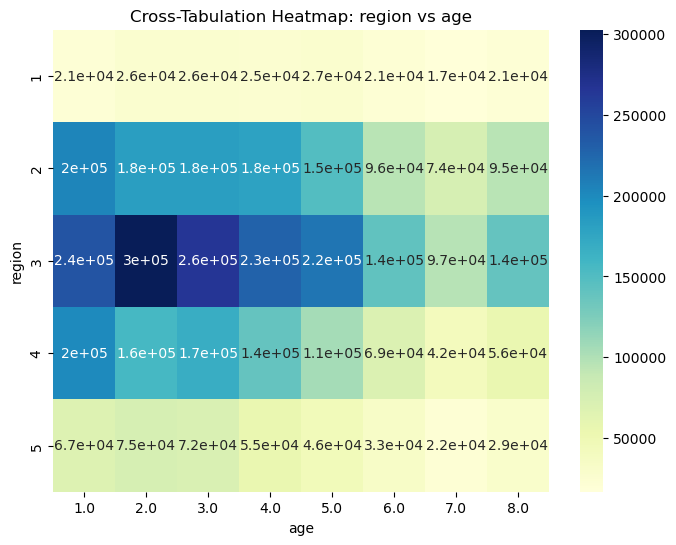

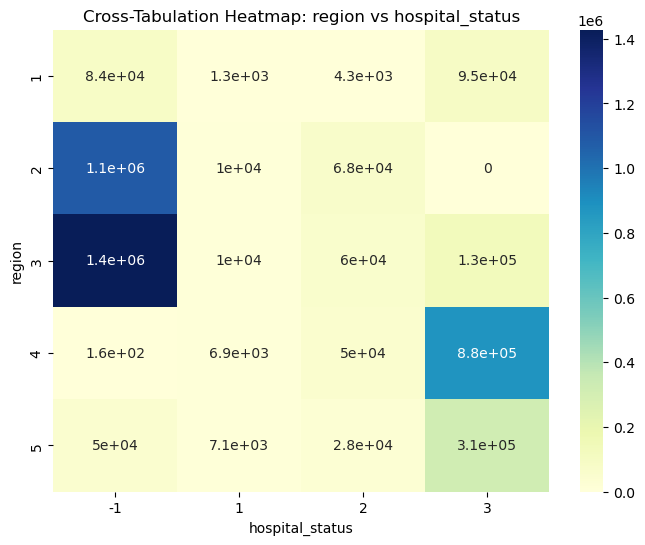

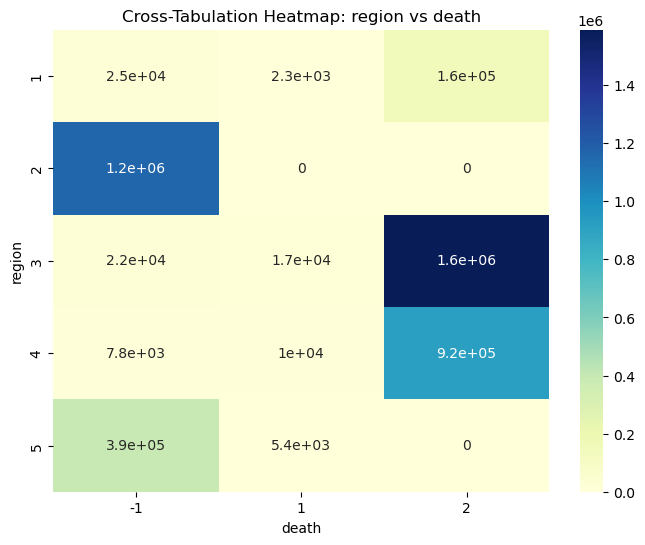

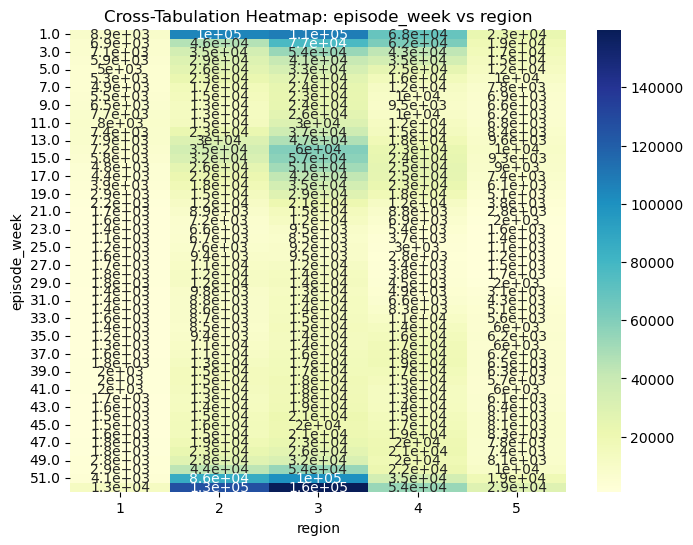

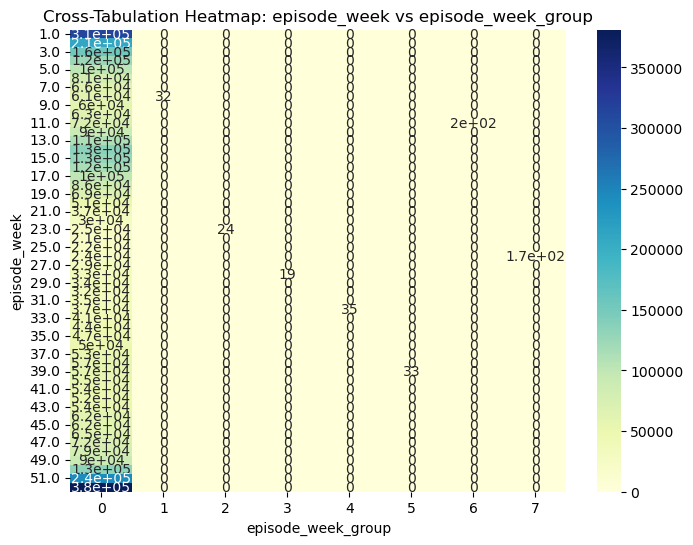

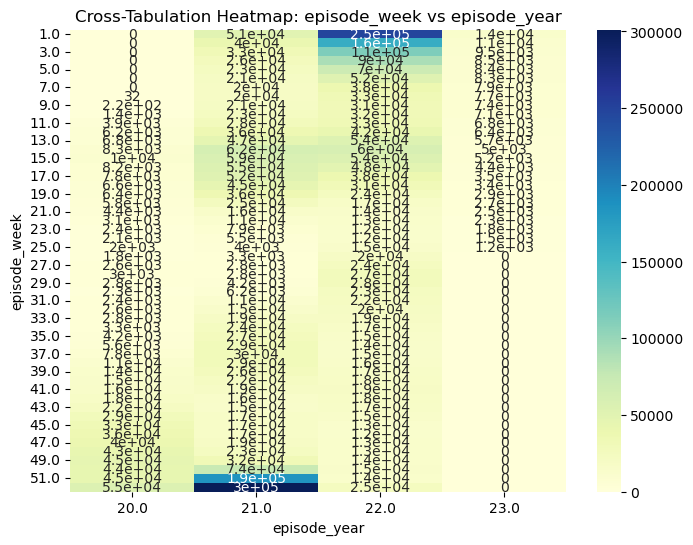

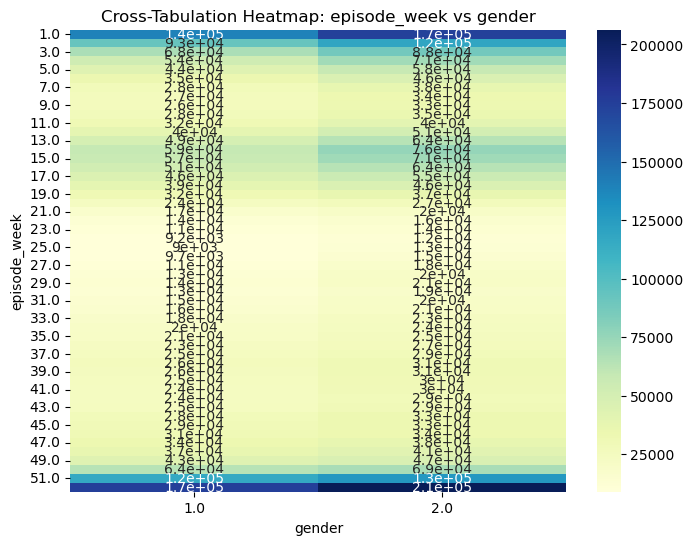

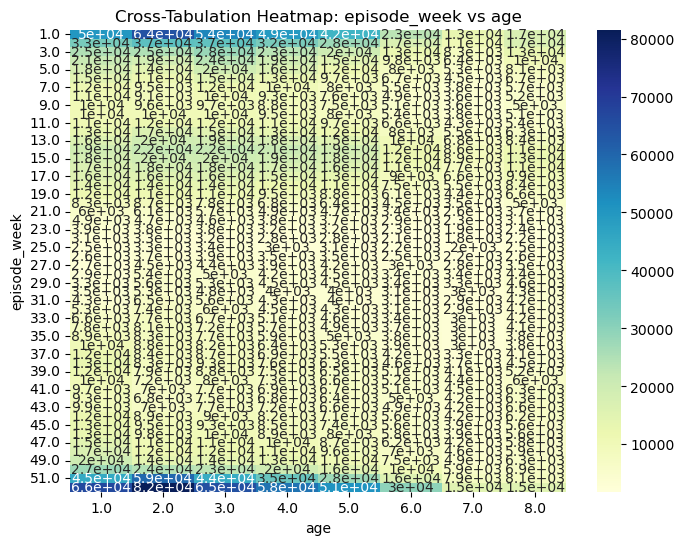

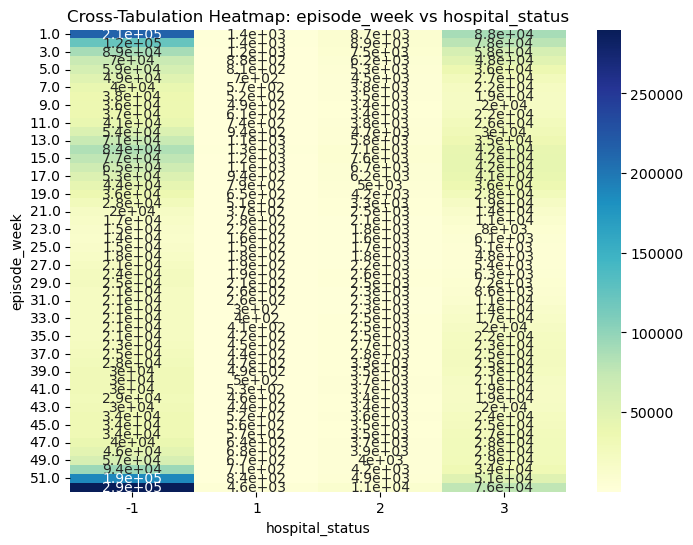

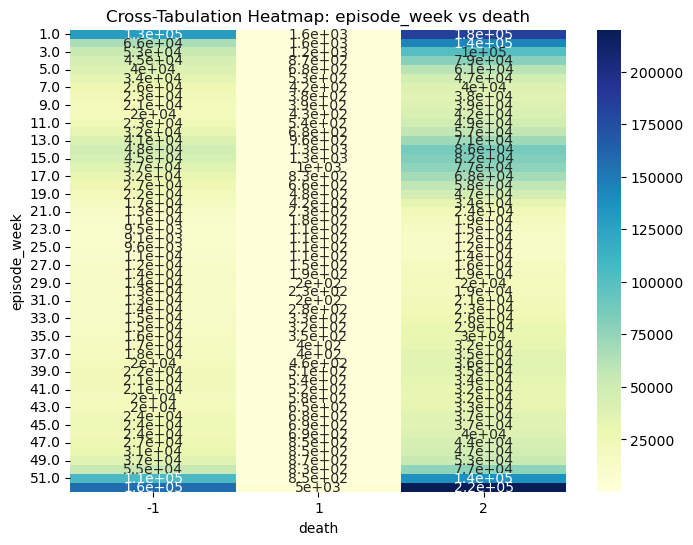

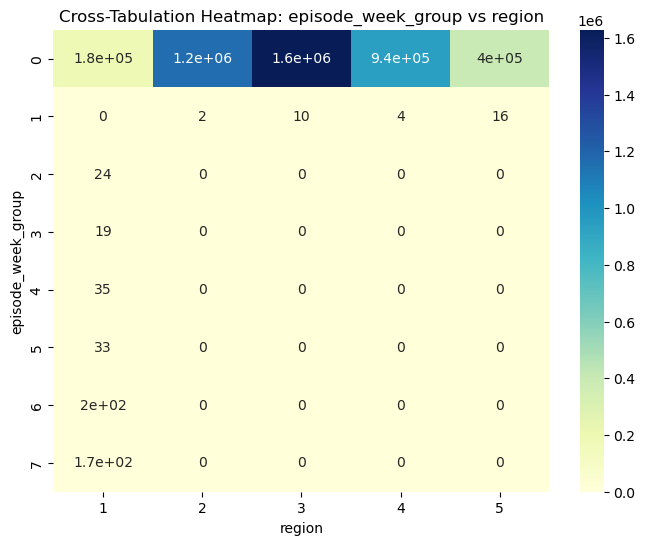

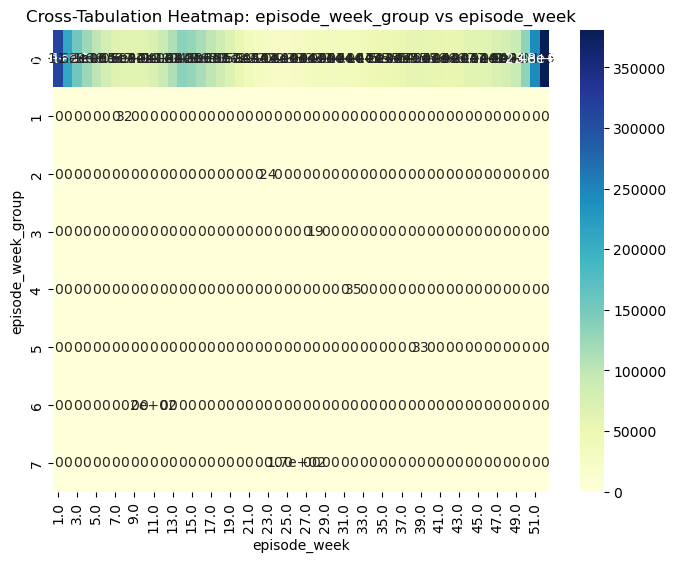

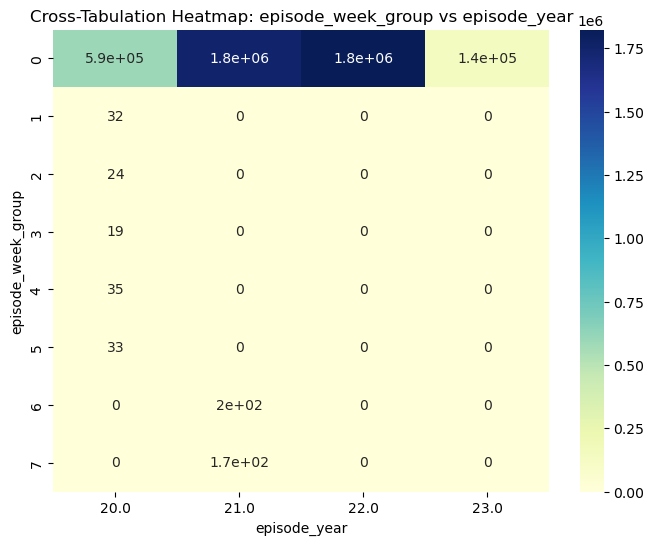

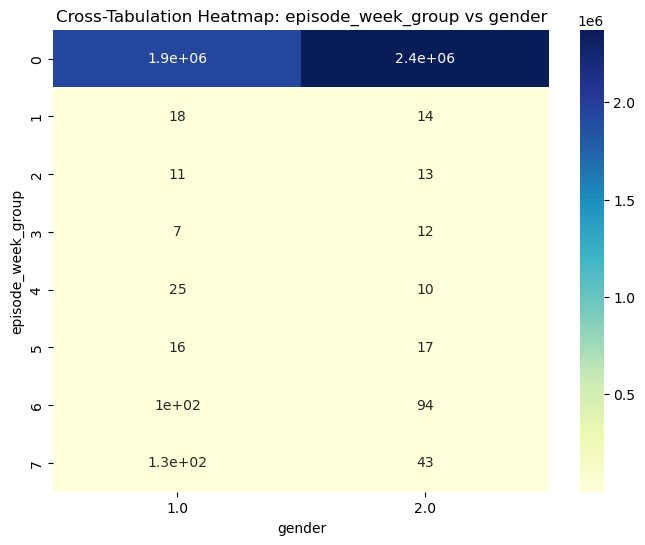

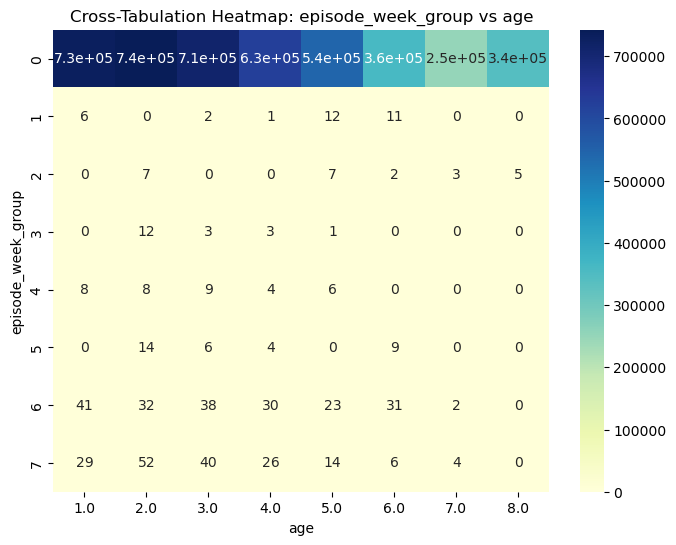

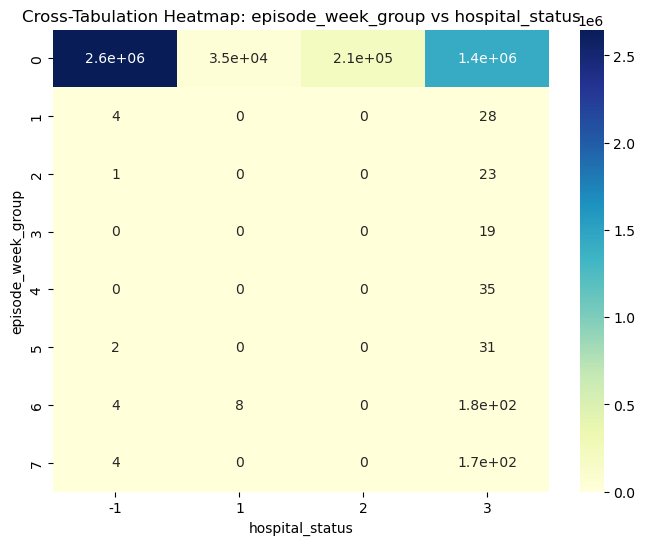

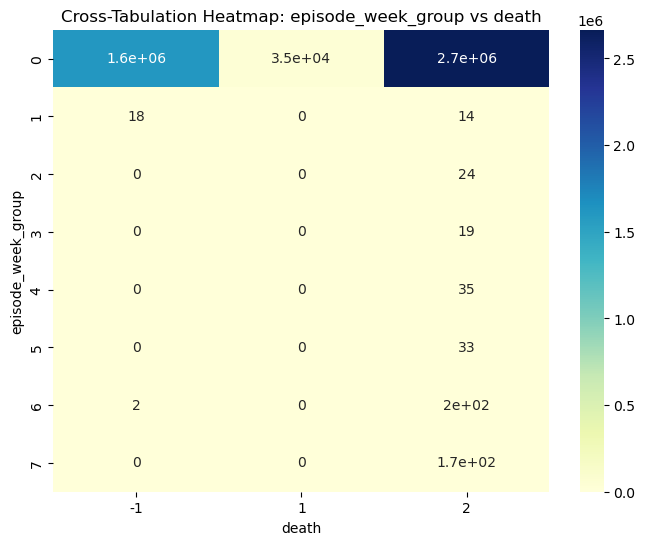

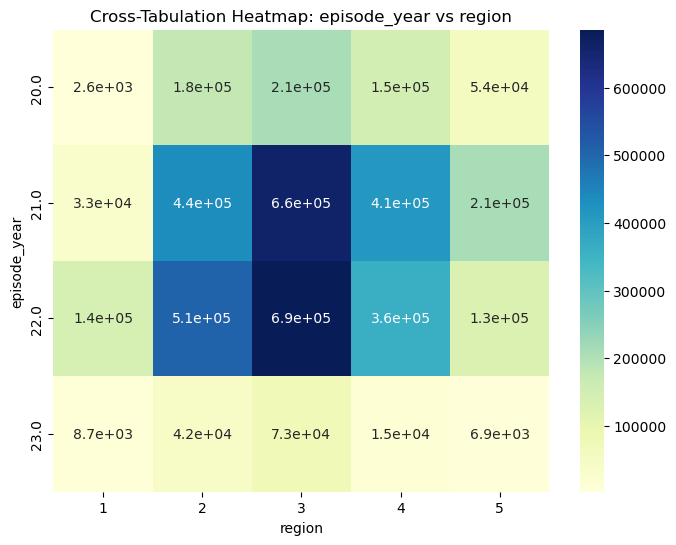

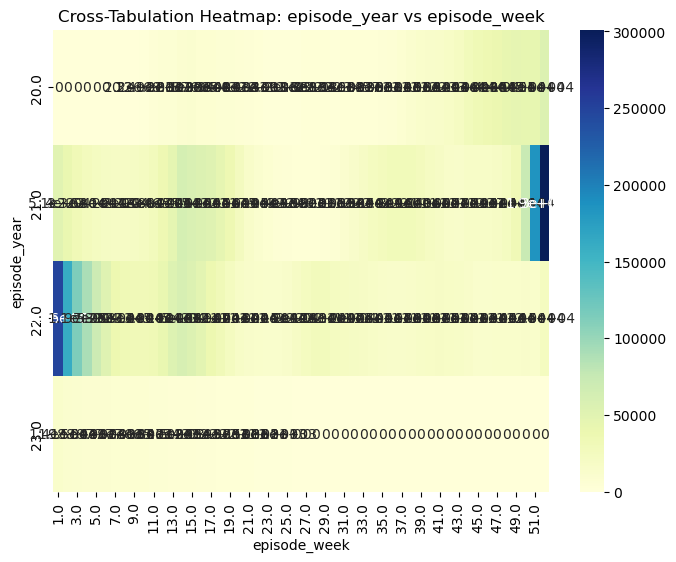

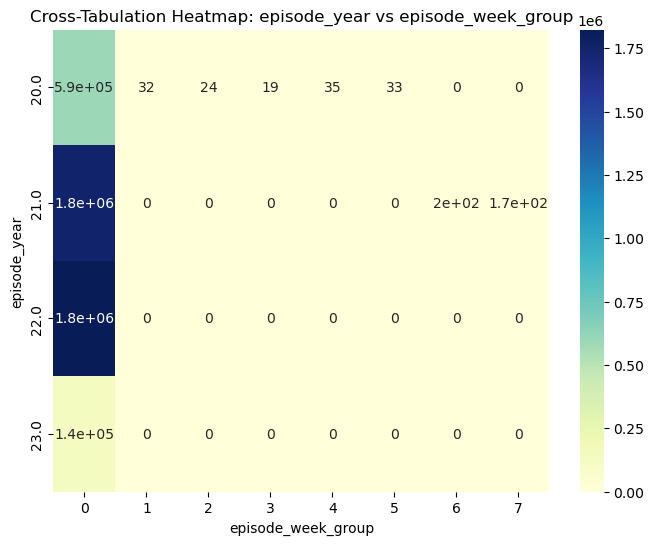

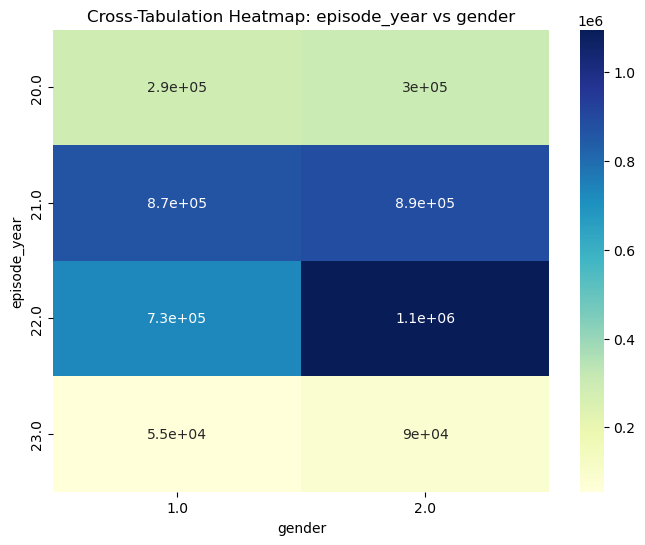

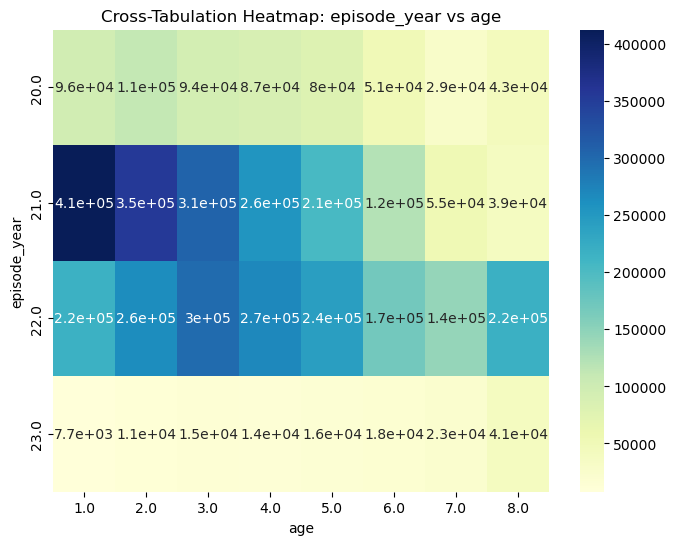

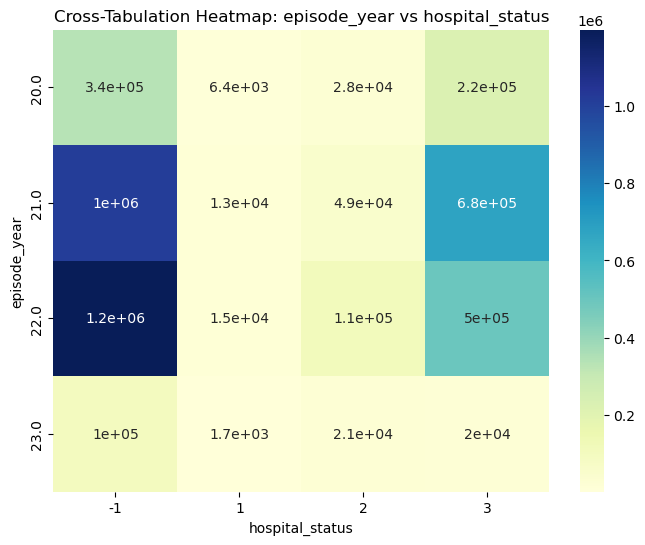

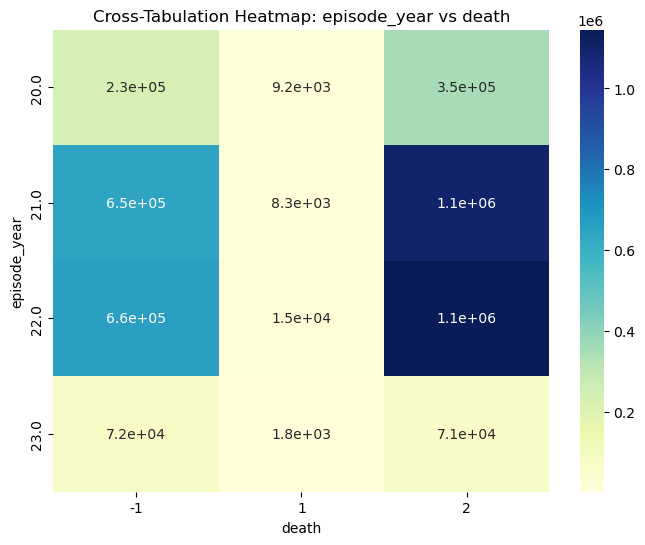

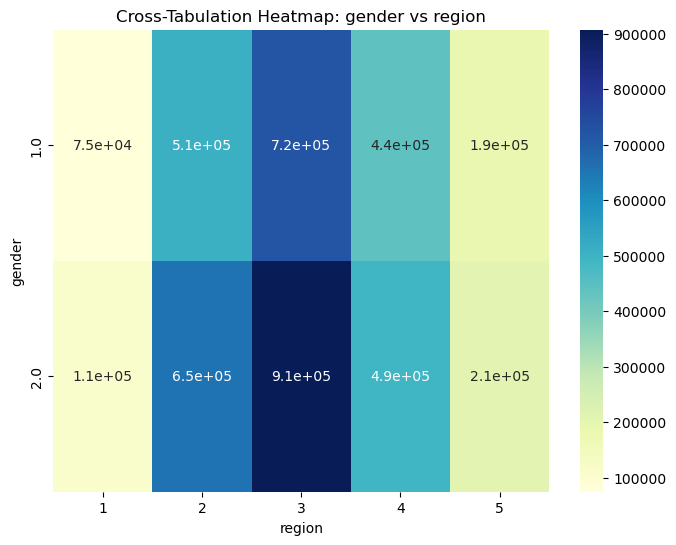

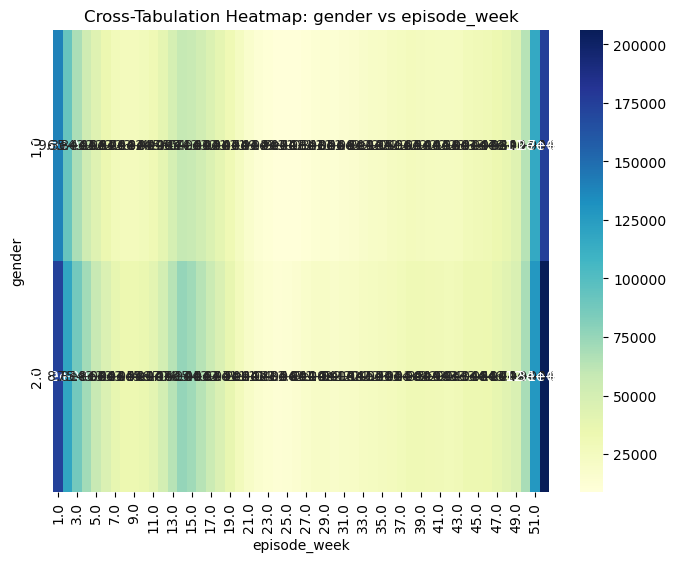

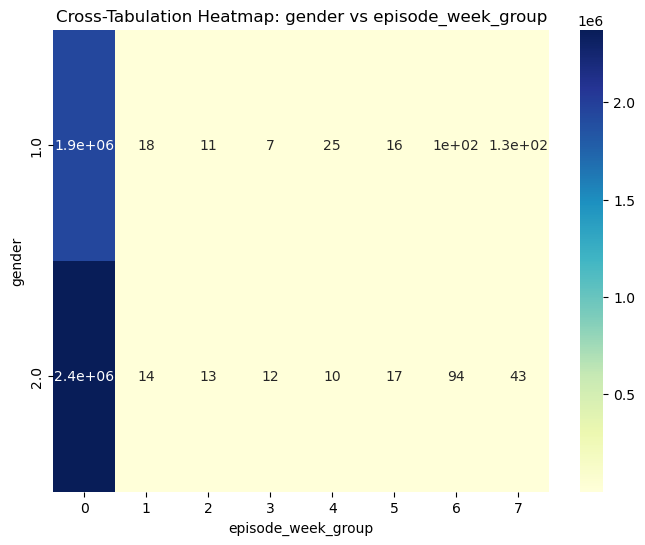

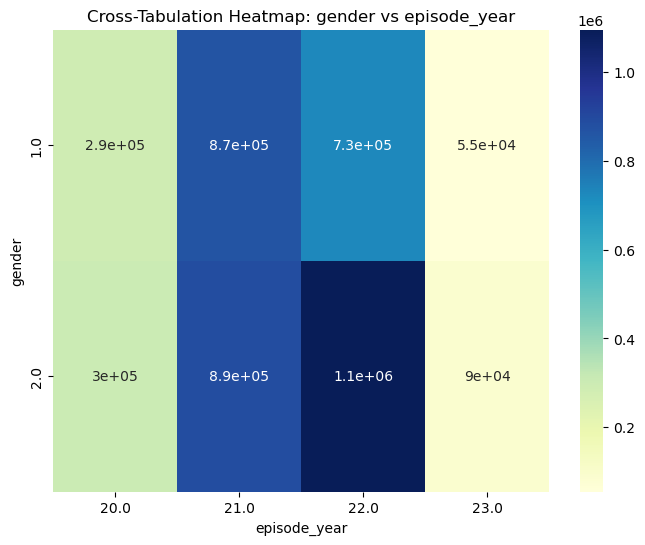

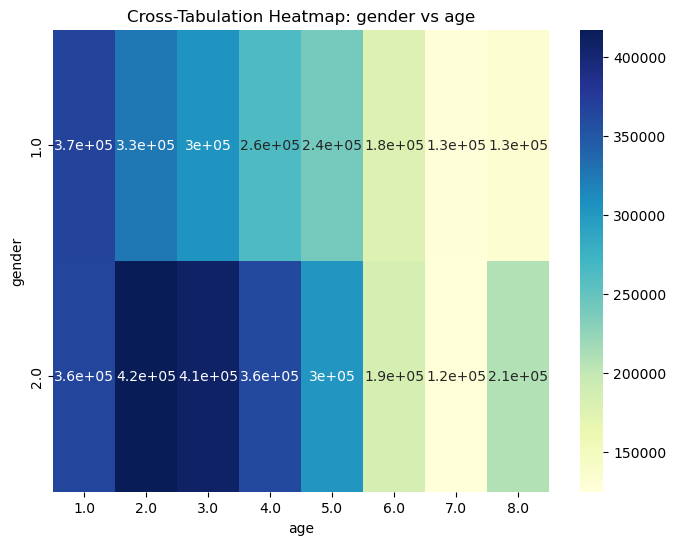

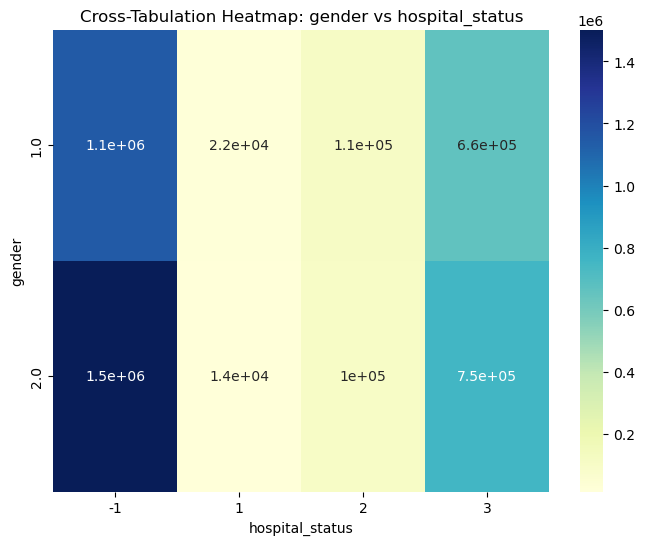

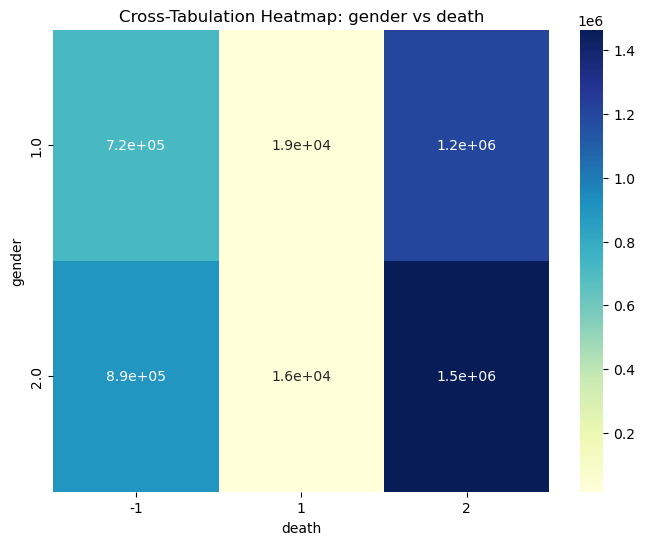

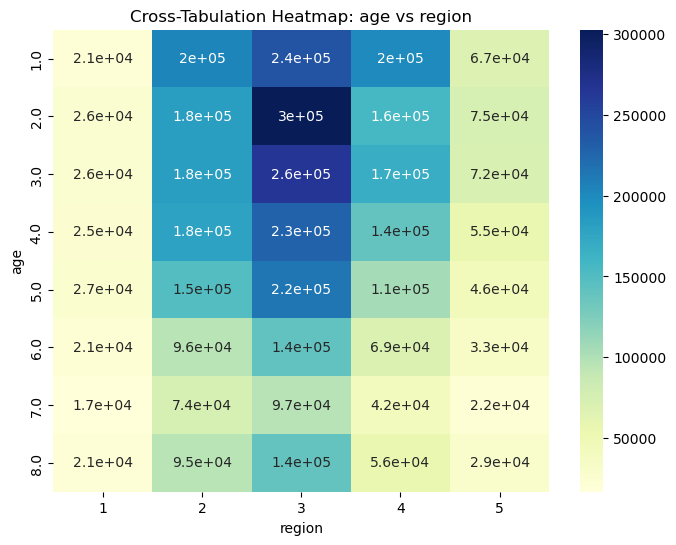

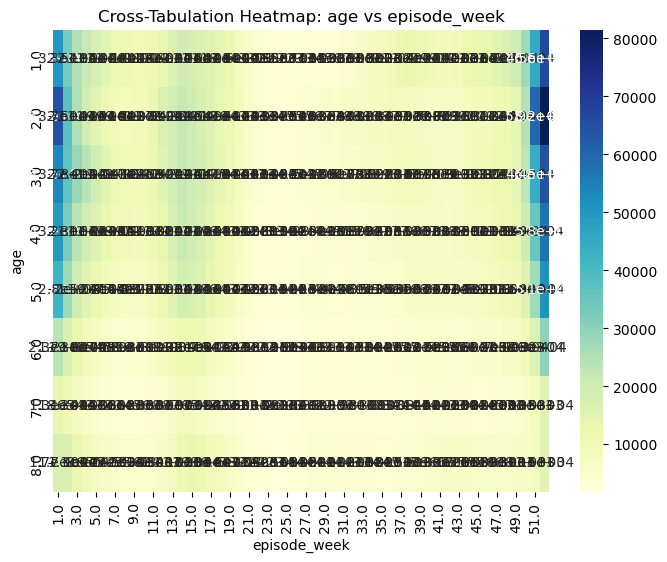

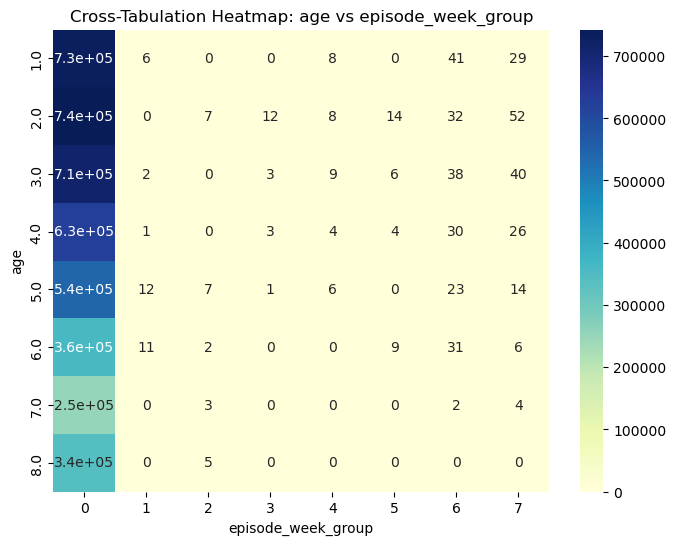

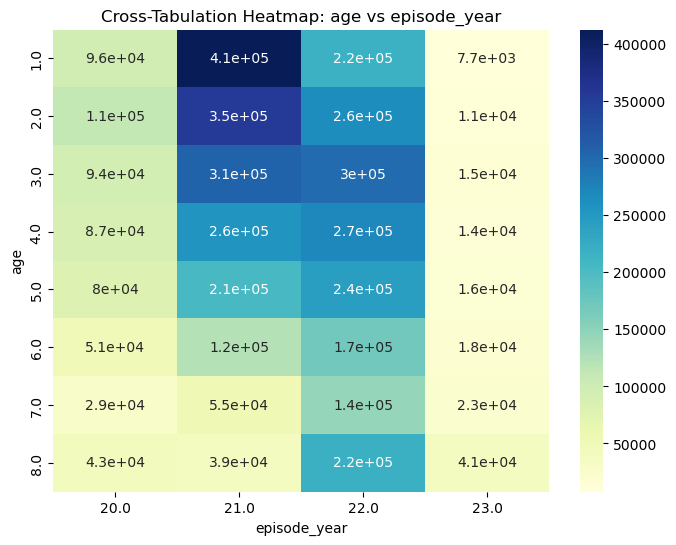

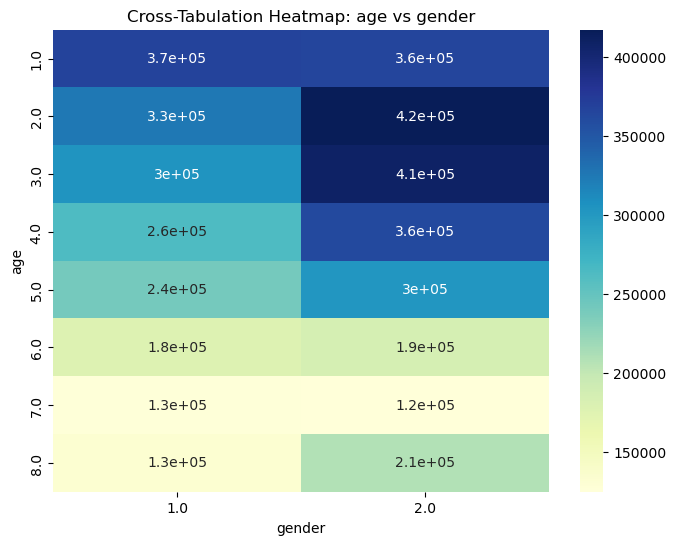

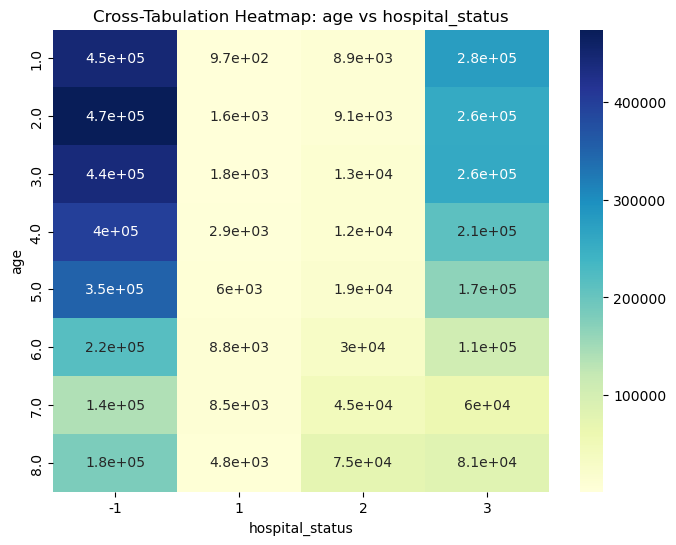

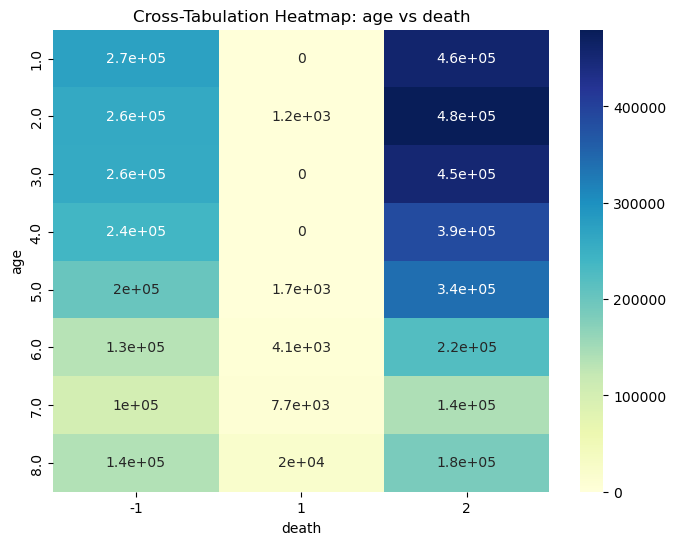

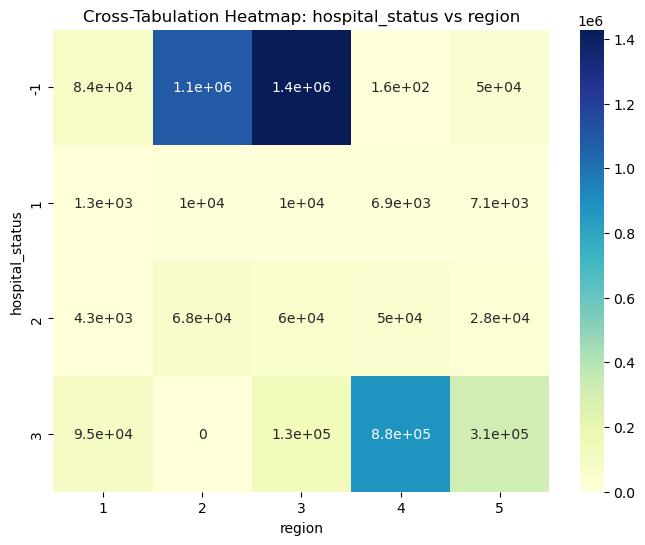

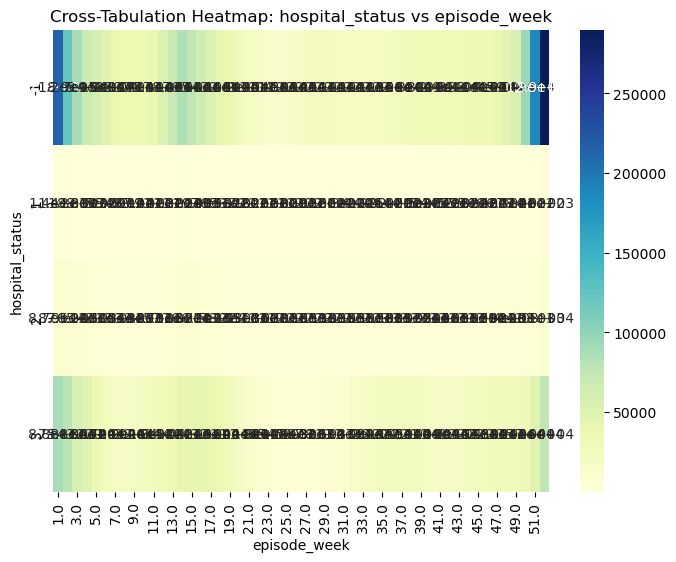

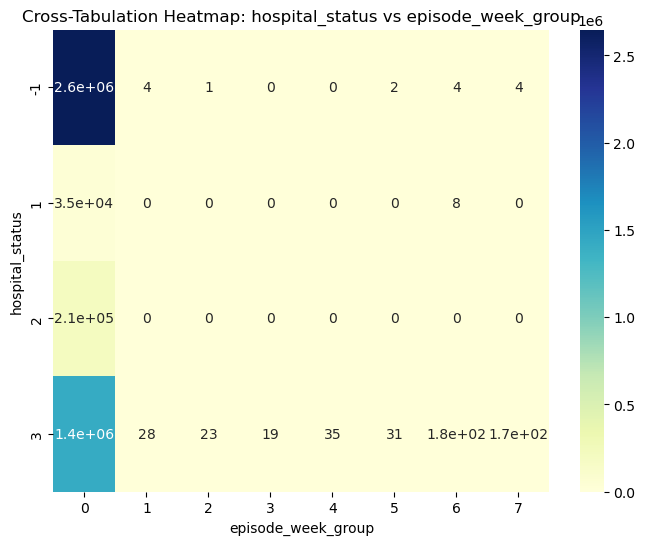

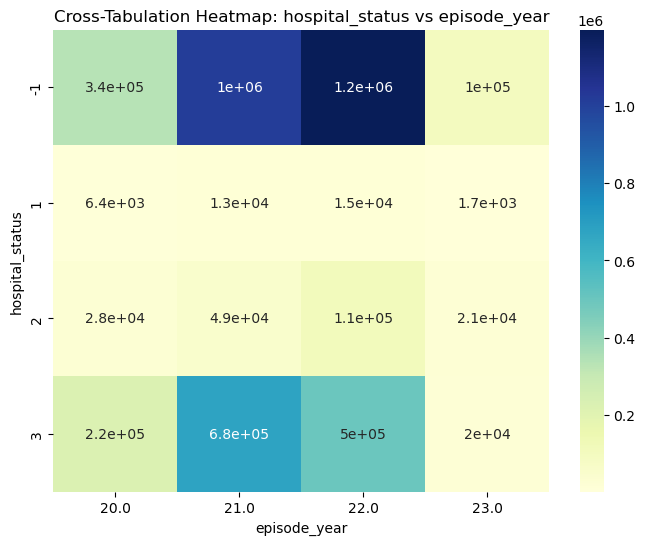

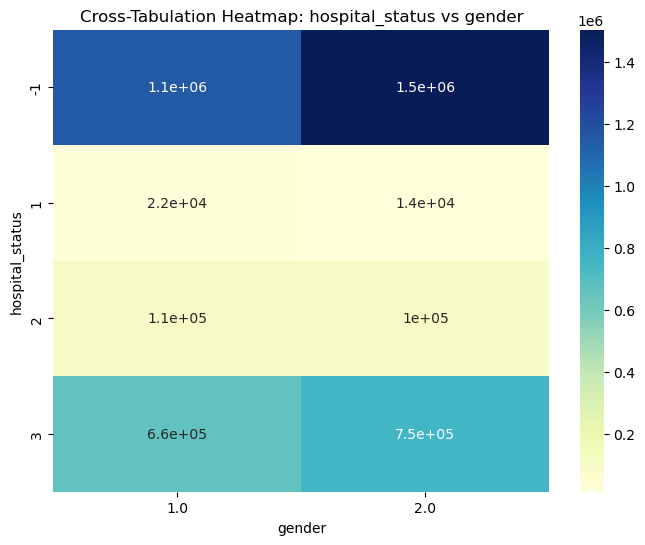

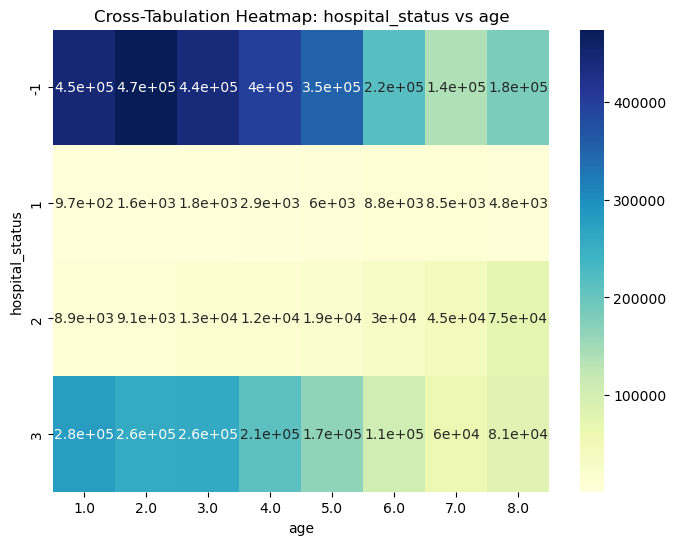

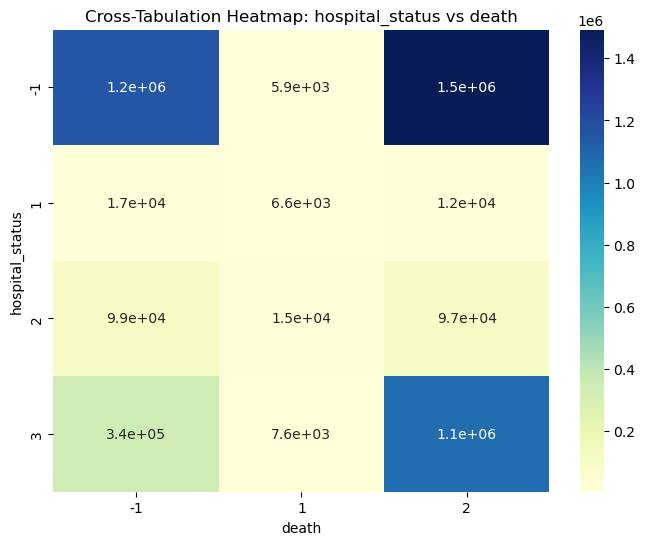

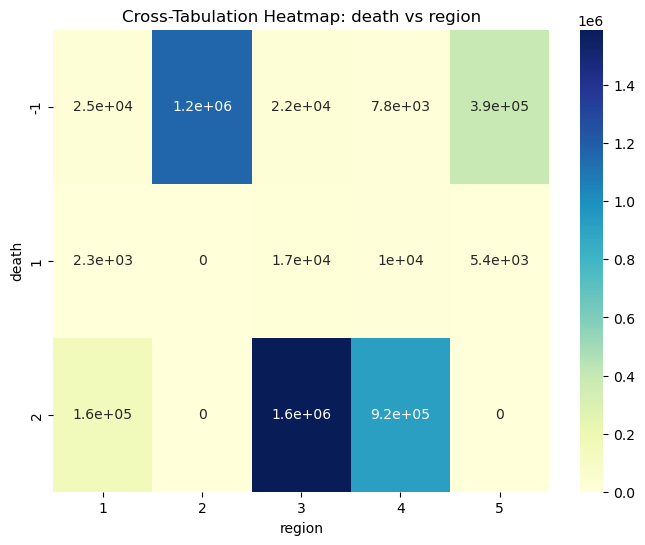

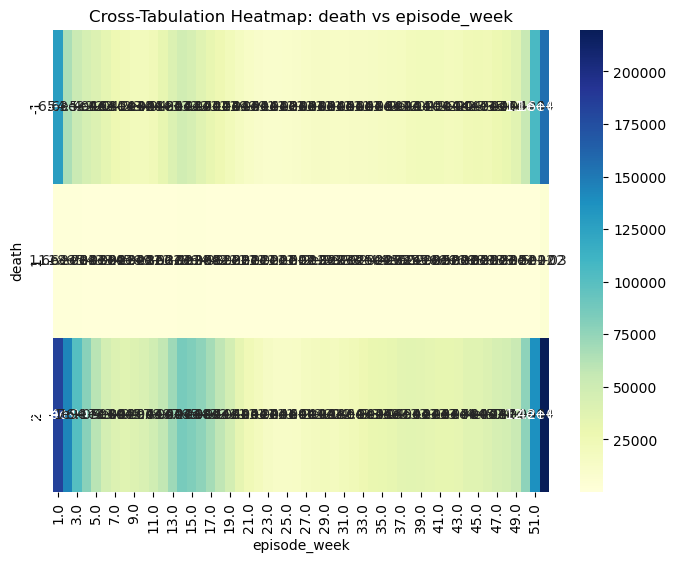

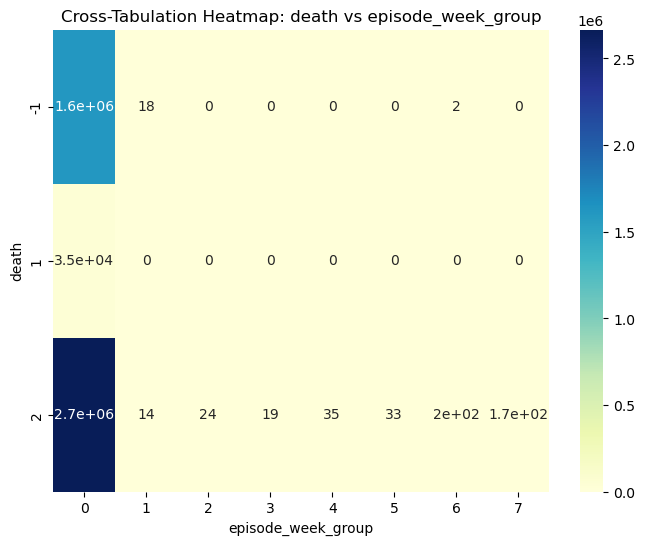

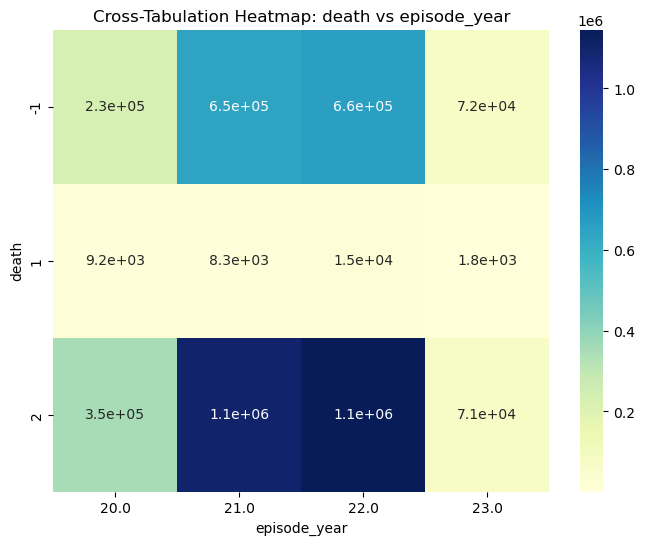

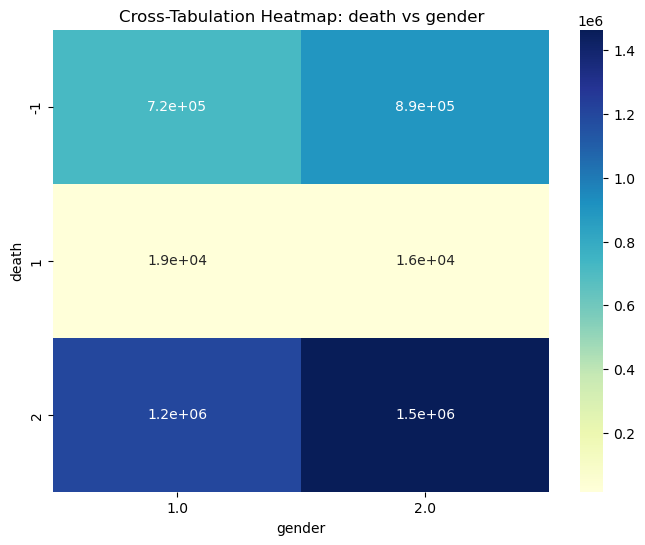

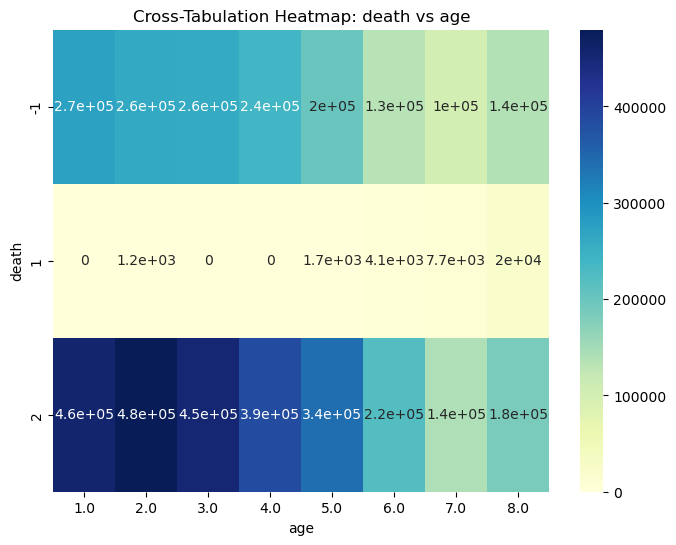

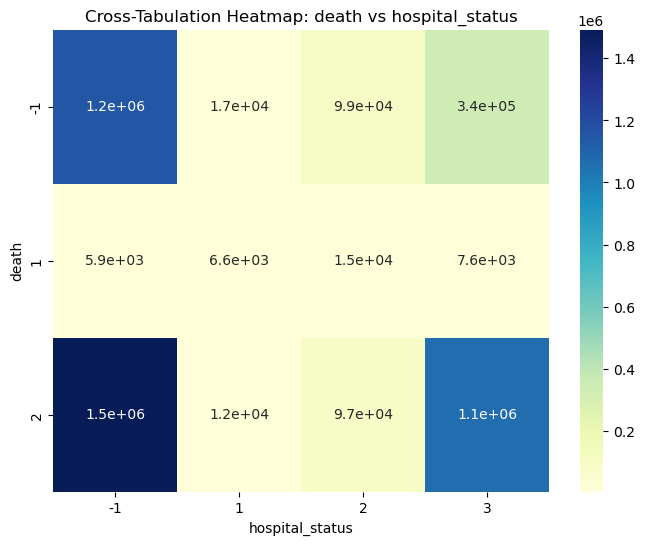

In [34]:
def visualize_relationships(df, categorical_columns):
    for col1 in categorical_columns:
        for col2 in categorical_columns:
            if col1 != col2:
                # Create a contingency table
                cross_tab = pd.crosstab(df[col1], df[col2])
                
                # Visualize the cross-tabulation using a heatmap
                plt.figure(figsize=(8, 6))
                sns.heatmap(cross_tab, cmap='YlGnBu', annot=True)
                plt.title(f"Cross-Tabulation Heatmap: {col1} vs {col2}")
                plt.show()

# Example usage:
categorical_columns = ['region', 'episode_week', 'episode_week_group', 'episode_year', 'gender', 'age', 'hospital_status', 'death']  # Add the columns you want to analyze
visualize_relationships(df, categorical_columns)

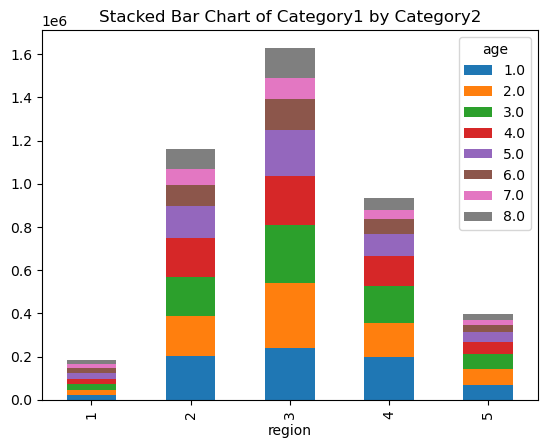

In [23]:
# Visualizations like stacked bar charts or heatmaps can help us visualize relationships 
# between categorical variables. Stacked bar charts can show the distribution of one category within another.

contingency_table = pd.crosstab(df['region'], df['age'])
contingency_table.plot(kind='bar', stacked=True)
plt.title("Stacked Bar Chart of Category1 by Category2")
plt.show()




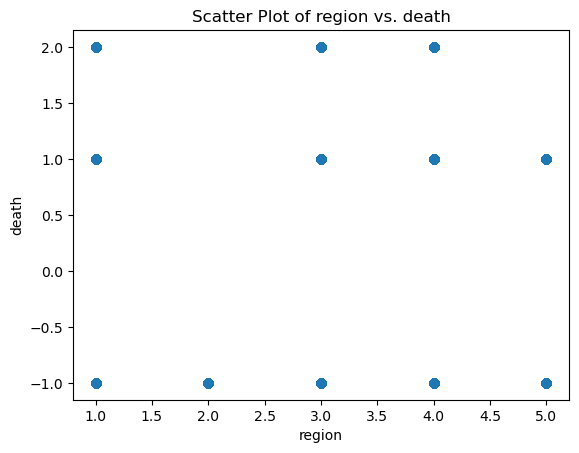

In [19]:
plt.scatter(df['region'], df['death'])
plt.xlabel('region')
plt.ylabel('death')
plt.title('Scatter Plot of region vs. death')
plt.show()